## How do I read a tabular data file into pandas? 

In [ ]:
tsv - \t
csv  - ,
txt   - \t,',',| 

xlsx

In [1]:
import pandas as pd
# read a dataset of Chipotle orders directly from a URL and store the results in a DataFrame
orders = pd.read_table('http://bit.ly/chiporders',sep='\t')

In [2]:
# examine the first 5 rows
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Documentation for [**`read_table`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

In [3]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user = pd.read_csv(r"C:\Users\Guhan\Documents\Verzeo\user.txt",sep='|', header=None, names=user_cols)

In [5]:
pd.read_excel('ufo.xlsx',sheet_name='ufo') #  shift + tab to see the fuction details

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [7]:
# examine the first 5 rows
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [8]:
user.tail()

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


## How do I select a pandas Series from a DataFrame?

In [9]:
# read a dataset of UFO reports into a DataFrame
import pandas as pd
ufo = pd.read_table('ufo.csv', sep=',')

In [11]:
# read_csv is equivalent to read_table, except it assumes a comma separator
ufo = pd.read_csv('ufo.csv')

In [12]:
# examine the first 5 rows
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [13]:
# select the 'City' Series using bracket notation
ufo['City']

# or equivalently, use dot notation
ufo.State #2

0        NY
1        NJ
2        CO
3        KS
4        NY
         ..
18236    IL
18237    IA
18238    WI
18239    WI
18240    FL
Name: State, Length: 18241, dtype: object

<!-- **Bracket notation** will always work, whereas **dot notation** has limitations: -->

- Dot notation doesn't work if there are **spaces** in the Series name
- Dot notation doesn't work if the Series has the same name as a **DataFrame method or attribute** (like 'head' or 'shape')
- Dot notation can't be used to define the name of a **new Series** (see below)

In [14]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [15]:
ufo.shape

(18241, 6)

## Why do some pandas commands end with parentheses (and others don't)?

In [16]:
# read a dataset of top-rated IMDb movies into a DataFrame
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')

**Methods** end with parentheses, while **attributes** don't:

In [17]:
# example method: show the first 5 rows
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [18]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 30.7+ KB


In [20]:
movies.genre.nunique()

16

In [21]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [22]:
# example method: calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [24]:
movies.describe(include='all')

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,The Girl with the Dragon Tattoo,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


In [23]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include='object')

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 30.7+ KB


In [26]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [27]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Documentation for [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

## 5. How do I rename columns in a pandas DataFrame? 

In [28]:
ufo = pd.read_csv('ufo.csv')

In [29]:
# examine the column names
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [30]:
# rename two of the columns by using the 'rename' method
# ufo.columns = ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}) # do not use
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

Documentation for [**`rename`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [31]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [32]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [33]:
# replace the column names during the file reading process by using the 'names' parameter
ufo = pd.read_csv('ufo.csv', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [34]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

Documentation for [**`str.replace`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html)

##  How do I remove columns from a pandas DataFrame? 

In [35]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [36]:
# remove a single column (axis=1 refers to columns)
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


Documentation for [**`drop`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [37]:
# remove multiple columns at once
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [40]:
ufo.head(10)

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00
7,DISK,7/15/1936 0:00
8,CIGAR,10/15/1936 17:00
10,LIGHT,8/15/1937 21:00
11,FIREBALL,6/1/1939 20:00


In [41]:
ufo.reset_index(inplace=True)

In [42]:
ufo.head()

,index,Shape Reported,Time
0,0,TRIANGLE,6/1/1930 22:00
1,1,OTHER,6/30/1930 20:00
2,3,DISK,6/1/1931 13:00
3,4,LIGHT,4/18/1933 19:00
4,5,DISK,9/15/1934 15:30


In [39]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([2,9], axis=0, inplace=True)
# ufo.reset_index()

## How do I sort a pandas DataFrame or a Series?

In [43]:
# read a dataset of top-rated IMDb movies into a DataFrame
# import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


**Note:** None of the sorting methods below affect the underlying data. (In other words, the sorting is temporary).

In [44]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [46]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html) for a **Series**. (Prior to version 0.17, use [**`order`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.order.html) instead.)

In [47]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('star_rating').head()

,star_rating,title,content_rating,genre,duration,actors_list
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
947,7.4,Eraserhead,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."


In [ ]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

Documentation for [**`sort_values`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) for a **DataFrame**. (Prior to version 0.17, use [**`sort`**](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sort.html) instead.)

In [48]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['star_rating', 'duration','content_rating'],ascending=[False,True,True]).head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."



## How do I filter rows of a pandas DataFrame by column value?

In [49]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [50]:
# examine the number of rows and columns
movies.shape

(979, 6)

**Goal:** Filter the DataFrame rows to only show movies with a 'duration' of at least 200 minutes.

In [51]:
movies.duration

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

In [52]:
movies.duration >= 200

0      False
1      False
2       True
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Name: duration, Length: 979, dtype: bool

In [54]:
movies[movies.duration >= 200]['title']

2                             The Godfather: Part II
7      The Lord of the Rings: The Return of the King
17                                     Seven Samurai
78                       Once Upon a Time in America
85                                Lawrence of Arabia
142                Lagaan: Once Upon a Time in India
157                               Gone with the Wind
204                                          Ben-Hur
445                             The Ten Commandments
476                                           Hamlet
630                                        Malcolm X
767                  It's a Mad, Mad, Mad, Mad World
Name: title, dtype: object

In [55]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [56]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

Documentation for [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

## How do I apply multiple filter criteria to a pandas DataFrame? 

In [1]:
# read a dataset of top-rated IMDb movies into a DataFrame
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
# filter the DataFrame to only show movies with a 'duration' of at least 200 minutes
movies[movies.duration >= 200]

Understanding **logical operators:**

- **`and`**: True only if **both sides** of the operator are True
- **`or`**: True if **either side** of the operator is True

Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [58]:
# use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [59]:
# using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [60]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)
# movies[movies.genre.isin(['Crime','Drame','Action'])].title

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

### When reading from a file, how do I read in only a subset of the columns?

In [61]:
# read a dataset of UFO reports into a DataFrame, and check the columns
import pandas as pd
ufo = pd.read_csv('ufo.csv')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [62]:
# specify which columns to include by name
ufo = pd.read_csv('ufo.csv', usecols=['City', 'State'])
print(ufo.columns)
# or equivalently, specify columns by position
ufo = pd.read_csv('ufo.csv', usecols=[0, 4])
ufo.columns

Index(['City', 'State'], dtype='object')


Index(['City', 'Time'], dtype='object')

In [63]:
ufo.head()

,City,Time
0,Ithaca,6/1/1930 22:00
1,Willingboro,6/30/1930 20:00
2,Holyoke,2/15/1931 14:00
3,Abilene,6/1/1931 13:00
4,New York Worlds Fair,4/18/1933 19:00


**Question:** When reading from a file, how do I read in only a subset of the rows?

In [64]:
# specify how many rows to read
ufo = pd.read_csv('ufo.csv', nrows=3)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

Documentation for [**`select_dtypes`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html)

## How do I use string methods in pandas? 

In [1]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

NameError: name 'pd' is not defined

In [67]:
# normal way to access string methods in Python
'hello'.upper()

'HELLO'

In [68]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [70]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [69]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [71]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').str.replace(',','').str.lower().head()

0                                                  NaN
1                                           clementine
2                                                apple
3                                                  NaN
4    tomatillo-red chili salsa (hot) black beans ri...
Name: choice_description, dtype: object

In [72]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]\(\)]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa Hot, Black Beans, Ri...
Name: choice_description, dtype: object

[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference

## How do I change the data type of a pandas Series?

In [73]:
# read a dataset of alcohol consumption into a DataFrame
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [74]:
# examine the data type of each Series
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [75]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Documentation for [**`astype`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)

In [76]:
# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'spirit_servings':float})
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [77]:
# read a dataset of Chipotle orders into a DataFrame
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [78]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [79]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [80]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [81]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

## When should I use a "groupby" in pandas?

In [3]:
# read a dataset of alcohol consumption into a DataFrame
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [11]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

In [ ]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Asia'].beer_servings.mean()

In [ ]:
drinks.continent.unique()

In [ ]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').describe()['beer_servings']

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [ ]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

In [15]:
# multiple aggregation functions can be applied simultaneously
import numpy as np

drinks.groupby('continent').agg(['count', 'mean', 'min', 'max','sum','median',np.percentile(25,25)])['beer_servings'].count

ValueError: no results

Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [ ]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

In [ ]:
drinks.describe()

In [5]:
# allow plots to appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

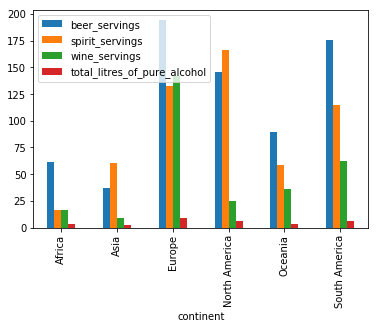

In [10]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [11]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

NameError: name 'movies' is not defined

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [ ]:
movies.head(10)

In [ ]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

In [ ]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

Documentation for [**`unique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) and [**`nunique`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

In [2]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
print(movies.content_rating.nunique())
movies.genre.nunique()

12


16

In [ ]:
genre - 16 
content_rating -12
12*16 = 192


https://pbpython.com/pandas-crosstab.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [9]:
import numpy as np
np.eye(3,3)
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
# compute a +cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating,margins=True)
# genre.action, content_Rating.approved - 3

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X,All
genre,,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0,135
Adventure,3,2,0,0,5,1,21,23,17,0,2,0,74
Animation,3,20,0,0,3,0,25,5,5,0,1,0,62
Biography,1,2,1,0,1,0,6,29,36,0,0,0,76
Comedy,9,2,1,1,16,3,23,23,73,0,4,1,156
Crime,6,0,0,1,7,1,6,4,87,0,11,1,124
Drama,12,3,0,4,24,1,25,55,143,1,9,1,278
Family,0,1,0,0,0,0,1,0,0,0,0,0,2
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0,1


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

In [ ]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts

In [ ]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

In [ ]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

Documentation for [**`plot`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

## How do I handle missing values in pandas? 

In [ ]:
# read a dataset of UFO reports into a DataFrame
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [ ]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

In [ ]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [ ]:
# count the number of missing values in each Series
ufo.isnull().sum()

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [ ]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [ ]:
# examine the number of rows and columns
ufo.shape

In [ ]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [ ]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

In [ ]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

In [ ]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

In [ ]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

In [ ]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts()

In [ ]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False)

Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [ ]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)
# ufo['Shape Reported'].isnull().sum()

Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

In [ ]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

[Working with missing data in pandas](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

In [ ]:
# 'country' is now the index
# drinks.set_index('country',inplace=True)
drinks.head()

In [ ]:
# 'country' is no longer a column
drinks.columns

In [ ]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

In [ ]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

In [ ]:
# index name is optional
drinks.index.name = None
drinks.head()

In [ ]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

Documentation for [**`reset_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

## How do I select multiple rows and columns from a pandas DataFrame? 

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

In [ ]:
# loc  - [index/bool,'column names']
# iloc - [index/bool,index position]  

The [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method is used to select rows and columns by **label**. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [ ]:
# row 0, all columns
ufo.loc[1, :]

In [ ]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

In [ ]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

In [ ]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

In [ ]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:10, 'City']

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

In [ ]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

In [ ]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

In [ ]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

In [ ]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

In [ ]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

The [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) method is used to select rows and columns by **integer position**. You can pass it:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [ ]:
ufo.head()

In [ ]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

In [ ]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

In [ ]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

In [ ]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

In [ ]:
# read a dataset of alcohol consumption into a DataFrame and set 'country' as the index
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

In [ ]:
# use the 'category' data type (new in pandas 0.15) to store the 'continent' strings as integers
# drinks.reset_index(inplace=True)
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

In [ ]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

In [ ]:
7 - africa - 0 


In [ ]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

In [ ]:
# memory usage has been drastically reduced
drinks.memory_usage(deep=True)

In [ ]:
# repeat this process for the 'country' Series
drinks.index = drinks.index.astype('category')
drinks.memory_usage(deep=True)

In [ ]:
# memory usage increased because we created 193 categories
drinks.index.astype('category').categories

The **category** data type should only be used with a string Series that has a **small number of possible values**.

In [ ]:
goodl

In [ ]:
# create a small DataFrame from a dictionary
import pandas as pd
df = pd.DataFrame({'ID':[100, 101, 102, 103], 'quality':['good', 'very good', 'good', 'excellent']})
df

In [ ]:
# sort the DataFrame by the 'quality' Series (alphabetical order)
df.sort_values('quality')

In [ ]:
# define a logical ordering for the categories
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['good', 'very good', 'excellent'], ordered=True)
df['quality'] = df.quality.astype(cat_type)
df.quality

In [ ]:
# sort the DataFrame by the 'quality' Series (logical order)
df.sort_values('quality')

In [ ]:
# comparison operators work with ordered categories
df.loc[df.quality > 'good', :]

[Overview of categorical data in pandas](http://pandas.pydata.org/pandas-docs/stable/categorical.html)

[API reference for categorical methods](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical)



## How do I create dummy variables in pandas?

In [17]:
# read the training dataset from Kaggle's Titanic competition
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

In [20]:
# alternative: use 'get_dummies' to create one column for every possible value
pd.get_dummies(train.Sex,prefix = 'Sex',prefix_sep='_',drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [10]:
# drop the first dummy variable ('female') using the 'iloc' method
pd.get_dummies(train.Sex).iloc[:, 1:].head()

,male
0,1
1,0
2,0
3,0
4,1


In [11]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [12]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
train.Embarked.head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [14]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [15]:
# drop the first dummy variable ('C')
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


How to translate these values back to the original 'Embarked' value:

- **0, 0** means **C**
- **1, 0** means **Q**
- **0, 1** means **S**

In [ ]:
# save the DataFrame of dummy variables and concatenate them to the original DataFrame
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [ ]:
# reset the DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

In [ ]:
# 0
# 1
# 2

In [ ]:
#
embarked
s=0
c=1
q=2

embr

In [19]:
from sklearn.preprocessing import preprocessing
le = LabelEncoder()
le = preprocessing.LabelEncoder()
train['Embarked']= le.fit_transform(train['Embarked'])
# movies

ImportError: cannot import name 'preprocessing' from 'sklearn.preprocessing' (C:\Users\Guhan\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()


Documentation for [**`get_dummies`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


## How do I work with dates and times in pandas?

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/


In [20]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [21]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [22]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [23]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [24]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

Documentation for [**`to_datetime`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [25]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [27]:
# ufo.Time.dt.we

In [ ]:
ufo.Time.dt.dayofyear.head()

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [ ]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

In [ ]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

In [ ]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

In [ ]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline

In [ ]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

In [ ]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

## How do I find and remove duplicate rows in pandas?

In [ ]:
# read a dataset of movie reviewers into a DataFrame
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

In [ ]:
users.shape

In [ ]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

In [ ]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

In [ ]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

In [ ]:
# count the duplicate rows
users.duplicated().sum()

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [ ]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

In [ ]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

In [ ]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

In [ ]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

In [ ]:
users.drop_duplicates(keep='last').shape

In [ ]:
users.drop_duplicates(keep=False).shape

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [ ]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

In [ ]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

## How do I avoid a SettingWithCopyWarning in pandas?

In [ ]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

In [ ]:
# count the missing values in the 'content_rating' Series
movies.content_rating.isnull().sum()

In [ ]:
# examine the DataFrame rows that contain those missing values
movies[movies.content_rating.isnull()]

In [ ]:
# examine the unique values in the 'content_rating' Series
movies.content_rating.value_counts()

**Goal:** Mark the 'NOT RATED' values as missing values, represented by 'NaN'.

In [ ]:
# first, locate the relevant rows
movies[movies.content_rating=='NOT RATED'].head()

In [ ]:
# then, select the 'content_rating' Series from those rows
movies[movies.content_rating=='NOT RATED'].content_rating.head()

In [ ]:
# finally, replace the 'NOT RATED' values with 'NaN' (imported from NumPy)
import numpy as np
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

**Problem:** That statement involves two operations, a **`__getitem__`** and a **`__setitem__`**. pandas can't guarantee whether the **`__getitem__`** operation returns a view or a copy of the data.

- If **`__getitem__`** returns a view of the data, **`__setitem__`** will affect the 'movies' DataFrame.
- But if **`__getitem__`** returns a copy of the data, **`__setitem__`** will not affect the 'movies' DataFrame.

In [ ]:
# the 'content_rating' Series has not changed
movies.content_rating.isnull().sum()

**Solution:** Use the **`loc`** method, which replaces the 'NOT RATED' values in a single **`__setitem__`** operation.

In [ ]:
# replace the 'NOT RATED' values with 'NaN' (does not cause a SettingWithCopyWarning)
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
# this time, the 'content_rating' Series has changed
movies.content_rating.isnull().sum()

**Summary:** Use the **`loc`** method any time you are selecting rows and columns in the same statement.

**More information:** [Modern Pandas (Part 1)](http://tomaugspurger.github.io/modern-1.html)

In [ ]:
# create a DataFrame only containing movies with a high 'star_rating'
top_movies = movies.loc[movies.star_rating >= 9, :]
top_movies

**Goal:** Fix the 'duration' for 'The Shawshank Redemption'.

In [ ]:
# overwrite the relevant cell with the correct duration
top_movies.loc[0, 'duration'] = 150

**Problem:** pandas isn't sure whether 'top_movies' is a view or a copy of 'movies'.

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

In [ ]:
# 'movies' DataFrame has not been updated
movies.head(1)

**Solution:** Any time you are attempting to create a DataFrame copy, use the [**`copy`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html) method.

In [ ]:
# explicitly create a copy of 'movies'
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [ ]:
# pandas now knows that you are updating a copy instead of a view (does not cause a SettingWithCopyWarning)
top_movies.loc[0, 'duration'] = 150

In [ ]:
# 'top_movies' DataFrame has been updated
top_movies

Documentation on indexing and selection: [Returning a view versus a copy](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy)

Stack Overflow: [What is the point of views in pandas if it is undefined whether an indexing operation returns a view or a copy?](http://stackoverflow.com/questions/34884536/what-is-the-point-of-views-in-pandas-if-it-is-undefined-whether-an-indexing-oper)

##  How do I change display options in pandas?


In [ ]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
# only 60 rows will be displayed when printing
drinks

In [ ]:
# check the current setting for the 'max_rows' option
pd.get_option('display.max_rows')

Documentation for [**`get_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_option.html)

In [ ]:
# overwrite the current setting so that all rows will be displayed
pd.set_option('display.max_rows', None)
drinks

In [ ]:
# reset the 'max_rows' option to its default
pd.reset_option('display.max_rows')

Documentation for [**`set_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html) and [**`reset_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.reset_option.html)

In [ ]:
# the 'max_columns' option is similar to 'max_rows'
pd.get_option('display.max_columns')

In [ ]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
# an ellipsis is displayed in the 'Name' cell of row 1 because of the 'max_colwidth' option
pd.get_option('display.max_colwidth')

In [ ]:
# overwrite the current setting so that more characters will be displayed
pd.set_option('display.max_colwidth', 1000)
train.head()

In [ ]:
# overwrite the 'precision' setting to display 2 digits after the decimal point of 'Fare'
pd.set_option('display.precision', 2)
train.head()

In [ ]:
# add two meaningless columns to the drinks DataFrame
drinks['x'] = drinks.wine_servings * 1000
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000
drinks.head()

In [ ]:
# use a Python format string to specify a comma as the thousands separator
pd.set_option('display.float_format', '{:,}'.format)
drinks.head()

In [ ]:
# 'y' was affected (but not 'x') because the 'float_format' option only affects floats (not ints)
drinks.dtypes

In [ ]:
# view the option descriptions (including the default and current values)
pd.describe_option()

In [ ]:
# search for specific options by name
pd.describe_option('rows')

Documentation for [**`describe_option`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.describe_option.html)

In [ ]:
# reset all of the options to their default values
pd.reset_option('all')

## How do I create a pandas DataFrame from another object?

In [ ]:
# create a DataFrame from a dictionary (keys become column names, values become data)
pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']})

In [ ]:
# optionally specify the order of columns and define the index
df = pd.DataFrame({'id':[100, 101, 102], 'color':['red', 'blue', 'red']}, columns=['id', 'color'], index=['a', 'b', 'c'])
df

Documentation for [**`DataFrame`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

In [21]:
# create a DataFrame from a list of lists (each inner list becomes a row)
pd.DataFrame([[100, 'red'], [101, 'blue'], [102, 'red']], columns=['id', 'color'])

,id,color
0,100,red
1,101,blue
2,102,red


In [ ]:
# create a NumPy array (with shape 4 by 2) and fill it with random numbers between 0 and 1
import numpy as np
arr = np.random.rand(4, 2)
arr

In [ ]:
# create a DataFrame from the NumPy array
pd.DataFrame(arr, columns=['one', 'two'])

In [ ]:
# create a DataFrame of student IDs (100 through 109) and test scores (random integers between 60 and 100)
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)})

Documentation for [**`np.arange`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) and [**`np.random`**](http://docs.scipy.org/doc/numpy/reference/routines.random.html)

In [ ]:
# 'set_index' can be chained with the DataFrame constructor to select an index
pd.DataFrame({'student':np.arange(100, 110, 1), 'test':np.random.randint(60, 101, 10)}).set_index('student')

Documentation for [**`set_index`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

In [ ]:
# create a new Series using the Series constructor
s = pd.Series(['round', 'square'], index=['c', 'b'], name='shape')
s

Documentation for [**`Series`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [ ]:
# concatenate the DataFrame and the Series (use axis=1 to concatenate columns)
pd.concat([df, s], axis=1)

**Notes:**

- The Series name became the column name in the DataFrame.
- The Series data was aligned to the DataFrame by its index.
- The 'shape' for row 'a' was marked as a missing value (NaN) because that index was not present in the Series.

Documentation for [**`concat`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

## How do I apply a function to a pandas Series or DataFrame?

In [28]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [29]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [30]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [31]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [ ]:
# we want to extract the last name of each person
train.Name.head()

In [22]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [25]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [26]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [ ]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [32]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [33]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [34]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [36]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [35]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

0    0
1    1
2    0
3    2
4    0
dtype: int64

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [37]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [ ]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()